**Please use the following dataset for problems 1 - 6**





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from inspect import signature

import sklearn
from sklearn import linear_model, dummy, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [ ]:
import pandas as pd

URL_adult='https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/Adult'
df = pd.read_csv(URL_adult)




In [ ]:
print("First five rows")
print(df.head())
print("*********")
print("columns",df.columns)
print("*********")
print("shape:",df.shape)
print("*********")
print("Size:",df.size)
print("*********")
print(df.describe())
print("*********")
print(df.nunique())

First five rows
   age         workclass  demogweight  education  education-num  \
0   39         State-gov        77516  Bachelors             13   
1   50  Self-emp-not-inc        83311  Bachelors             13   
2   38           Private       215646    HS-grad              9   
3   53           Private       234721       11th              7   
4   28           Private       338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  income  
0          2174             0              40  United-States  <=5

**1. Add a new column to your dataset called RECORD_ID.  Provide unique integer values to this field to have a unique ID for each row.**




In [ ]:
### Show your work Here ###
df['Record_ID'] = pd.RangeIndex(start=1, stop=len(df) + 1)
print(df)

       age         workclass  demogweight     education  education-num  \
0       39         State-gov        77516     Bachelors             13   
1       50  Self-emp-not-inc        83311     Bachelors             13   
2       38           Private       215646       HS-grad              9   
3       53           Private       234721          11th              7   
4       28           Private       338409     Bachelors             13   
...    ...               ...          ...           ...            ...   
24995   41           Private       112507          10th              6   
24996   19           Private       236940       HS-grad              9   
24997   33           Private       278514       HS-grad              9   
24998   21                 ?       433330  Some-college             10   
24999   25           Private       258379     Bachelors             13   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       A

Provide sentence(s) explaining your solution:

Using original datafram 'df' (no need to split the data as this will not affect any values in my dataset)  I used pd.RangeIndex to generate a sequence of unique integers from 1 and going up from there. Assigned new column as 'Record_ID'. I do not like using all caps in my column names, it just not suit my thinking.

**2. Create a summary table showing number of records for each unique workclass value.  Save the output of this table as SUMMARY_01 How many of the records have a workclass of "?".  Replace the ? values with NaN (null).  Create a second summary table showing number of records for each unique workclass value with your newly "cleansed" data.  Save this output at SUMMARY_02.**

In [ ]:
### Show your Code Here ###

#Seeing what values are in my column
Summary_01 = df['workclass'].unique()
print('All Values in the Workclass Category')
print(Summary_01)
#Count on Unique Values
question_count = (df['workclass'] == '?').sum()
print(f'Number of ? Occurences in the "workclass" column: {question_count}')
#Create Null Values
replace_workclass = ['?']
summary_02 = df['workclass'].replace(replace_workclass, np.nan)
summary_02.head()


All Values in the Workclass Category
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Number of ? Occurences in the "workclass" column: 1399


0           State-gov
1    Self-emp-not-inc
2             Private
3             Private
4             Private
Name: workclass, dtype: object

Provide sentence(s) explaining your solution:

First I wanted to see what values were in my 'workclass' column to see what unique values I had. When i confirmed the '?' within that column I wanted to run a count throughout to see how many blank variables I would have. Once I confirmed these two variables I used the pandas module for 'replace' and numpy 'NaN' to replace '?' values a null.


**3. Create a new column called EDUCATION_NUMERIC.  Re-express the EDUCATION field as numberic values in this new field.  Create a contingency table showing EDUCATION_NUMERIC and EDUCATION.  There are several approaches you can take to assigning numeric values to the education qualitative education levels - in your explanation below, provide explanation on why you chose the values you did for each education level.**

In [ ]:
### Show your Code Here ###
# df.shape
# df_train.shape
# df_test.shape
df_train_num = df['education'].unique()
print(df_train_num)
df_train_age = df['age'].unique()
print(df_train_age)
# HS-Grad = 12, Bachelors = 14,

education_numeric_map = {
    'Preschool': 0,
    '1st-4th': 1,
    '5th-6th': 2,
    '7th-8th': 3,
    '9th': 4,
    '10th': 5,
    '11th': 6,
    '12th': 7,
    'HS-grad': 8,
    'Some-college': 9,
    'Assoc-acdm': 10,
    'Assoc-voc': 11,
    'Bachelors': 12,
    'Masters': 13,
    'Doctorate': 14,
    'Prof-school': 15
}

df['education_numeric'] = df['education'].map(education_numeric_map)
print(df)


#Creating a contingency table on Education Numeric vs Categorical
crosstab_education = pd.crosstab(df['education'], df['education_numeric'])
print("Cross tab Education Numeric vs Categorical")
print(crosstab_education)




['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86]
       age         workclass  demogweight     education  education-num  \
0       39         State-gov        77516     Bachelors             13   
1       50  Self-emp-not-inc        83311     Bachelors             13   
2       38           Private       215646       HS-grad              9   
3       53           Private       234721          11th              7   
4       28           Private       338409     Bachelors             13   
...    ...               ...          ...           ...            ...   
24995   41           Private       112507          10th              6   
24996   19       

In [ ]:
#Split dataset as we are beginning to model data

#  #columns Index(['age', 'workclass', 'demogweight', 'education', 'education-num',
#        'marital-status', 'occupation', 'relationship', 'race', 'sex',
#        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
#        'income'],

x = df[['age', 'workclass', 'demogweight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']] #predictors


y = df['income'] #target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

Provide sentence(s) explaining your solution:

First, I wanted to provide a list of the values within the education column by using unique. My original thinking was that I needed/should split the database but about halfway through I realized I wanted to show the numerical field in both the test and train so I ended up altering the dataframe as a whole. I used a technique called mapping and simply started with the lowest grade/education from the unique finding to return the lowest categorical value. Mapping is a bit more simple for how my brain operates instead of using the technique shown in the text. It feels a bit more organized.


**4. Create a new field called AGE_Z.  Calculate the z-score for AGE and populate in this column.  Create a histogram showing the distribution.**




Average Age 38.66970666666667
Age St. Dev 13.710475787293289
Z Score on Age 6920     0.315838
17926   -0.267657
1123    -0.194720
4518     1.628703
5576     0.461712
           ...   
21575    0.024091
5390    -0.559405
860     -1.507585
15795    0.826397
23654   -0.340594
Name: age, Length: 18750, dtype: float64


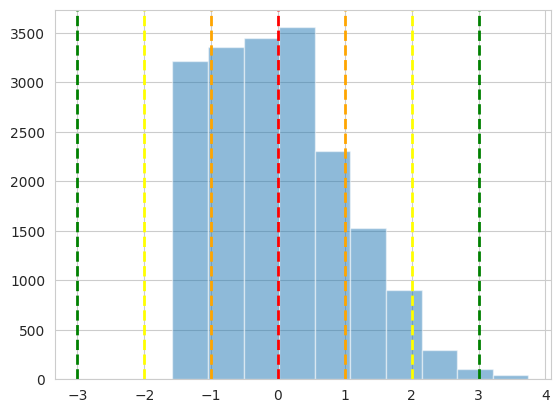

In [ ]:
### Show your Code Here ###
mean = np.mean(x_train['age'])
print("Average Age", mean)
std_dev_age = np.std(x_train['age'])
print("Age St. Dev", std_dev_age)
z_score_age = (x_train['age'] - mean)/ std_dev_age
print("Z Score on Age", z_score_age)
# Histogram to show skewness of Z score!
x_train_age = x_train['age']
plt.hist(z_score_age, bins=10, alpha=0.5, label='Z-Scores')
plt.axvline(0, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(1, color='orange', linestyle='dashed', linewidth=2, label='1 Std Dev')
plt.axvline(-1, color='orange', linestyle='dashed', linewidth=2)
plt.axvline(2, color='yellow', linestyle='dashed', linewidth=2, label='2 Std Dev')
plt.axvline(-2, color='yellow', linestyle='dashed', linewidth=2)
plt.axvline(3, color='green', linestyle='dashed', linewidth=2, label='3 Std Dev')
plt.axvline(-3, color='green', linestyle='dashed', linewidth=2)




Provide sentence(s) explaining your solution

First I calculated the mean of the 'age' for the entire x_train dataset. I had originally split my columns using 'income' as my criterion I am examining and all other variables being predictors were placed into the x df's.

From the mean I calculated std deviation using numpy. I got the z score by subtracting all 'age' variables from the mean and dividing by the std deviation.

For the histogram, I wanted to see my skewness of the z score so I made the histogram transparent by using 'alpha' to create transparency so I could make avx lines as an overlay to show the specific x values (z scores) and highlight the left skewness.

**5. Do any of the records have outliar ages?  Why or why not?**

Outliers (Z scores >= 3 or <= -3):
12830    3.087442
2906     3.087442
18413    3.743874
12451    3.743874
13696    3.160379
           ...   
13025    3.306252
20953    3.014505
2891     3.743874
5104     3.743874
20463    3.379189
Name: age, Length: 76, dtype: float64
Total Outliers Above 3: 76
Total Outlier Below -3: 0


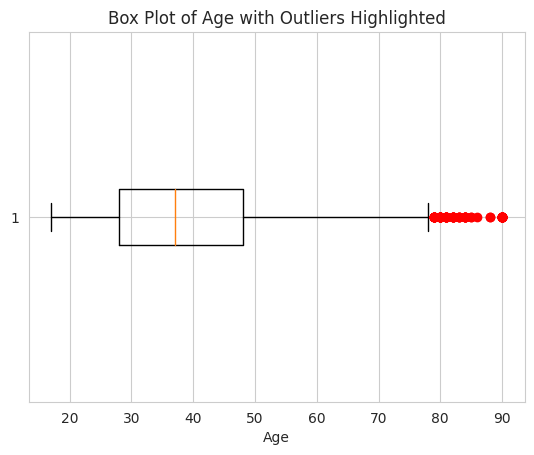

In [ ]:
### Show your Code Here ###
outliers = z_score_age[(z_score_age >=3) | (z_score_age <=-3)]
print("Outliers (Z scores >= 3 or <= -3):")
print(outliers)

above_3_age = z_score_age[z_score_age > 3]
below_minus_3 = z_score_age[z_score_age <-3]
total_above = len(above_3_age)
total_below = len(below_minus_3)
print("Total Outliers Above 3:", total_above)
print("Total Outlier Below -3:", total_below)

#Box Plot to Show Outliers
plt.boxplot(x_train['age'], vert=False, sym='ro')
plt.xlabel('Age')
plt.title('Box Plot of Age with Outliers Highlighted')
plt.show()




Provide sentence(s) explaining your solution

Yes we do have outliers in the 'age' column. We see skewness on the left side of the data however when we do a count we see that all outliers exist +3 standard deviations on the right side. Which means that are outliers are 3 standard deviations above the mean of 38 years old.

In my code, I wanted to find the totals of each to confirm this was true and I wasn't just seeing something visually. Hnece, I used the length to confirm. I knew this would be helpful to show on a box and whisker plot. The box and whisker shows distribution throughout my train data 'age'. The vert is set to false so I have it horizontally displayed and the sym is set to red 'ro' so I highlight that to the viewer.







**6. How many of the records have ages that fall within the middle 68%? 95%?  See 68-95-99 rule if unclear, or use the image below.**



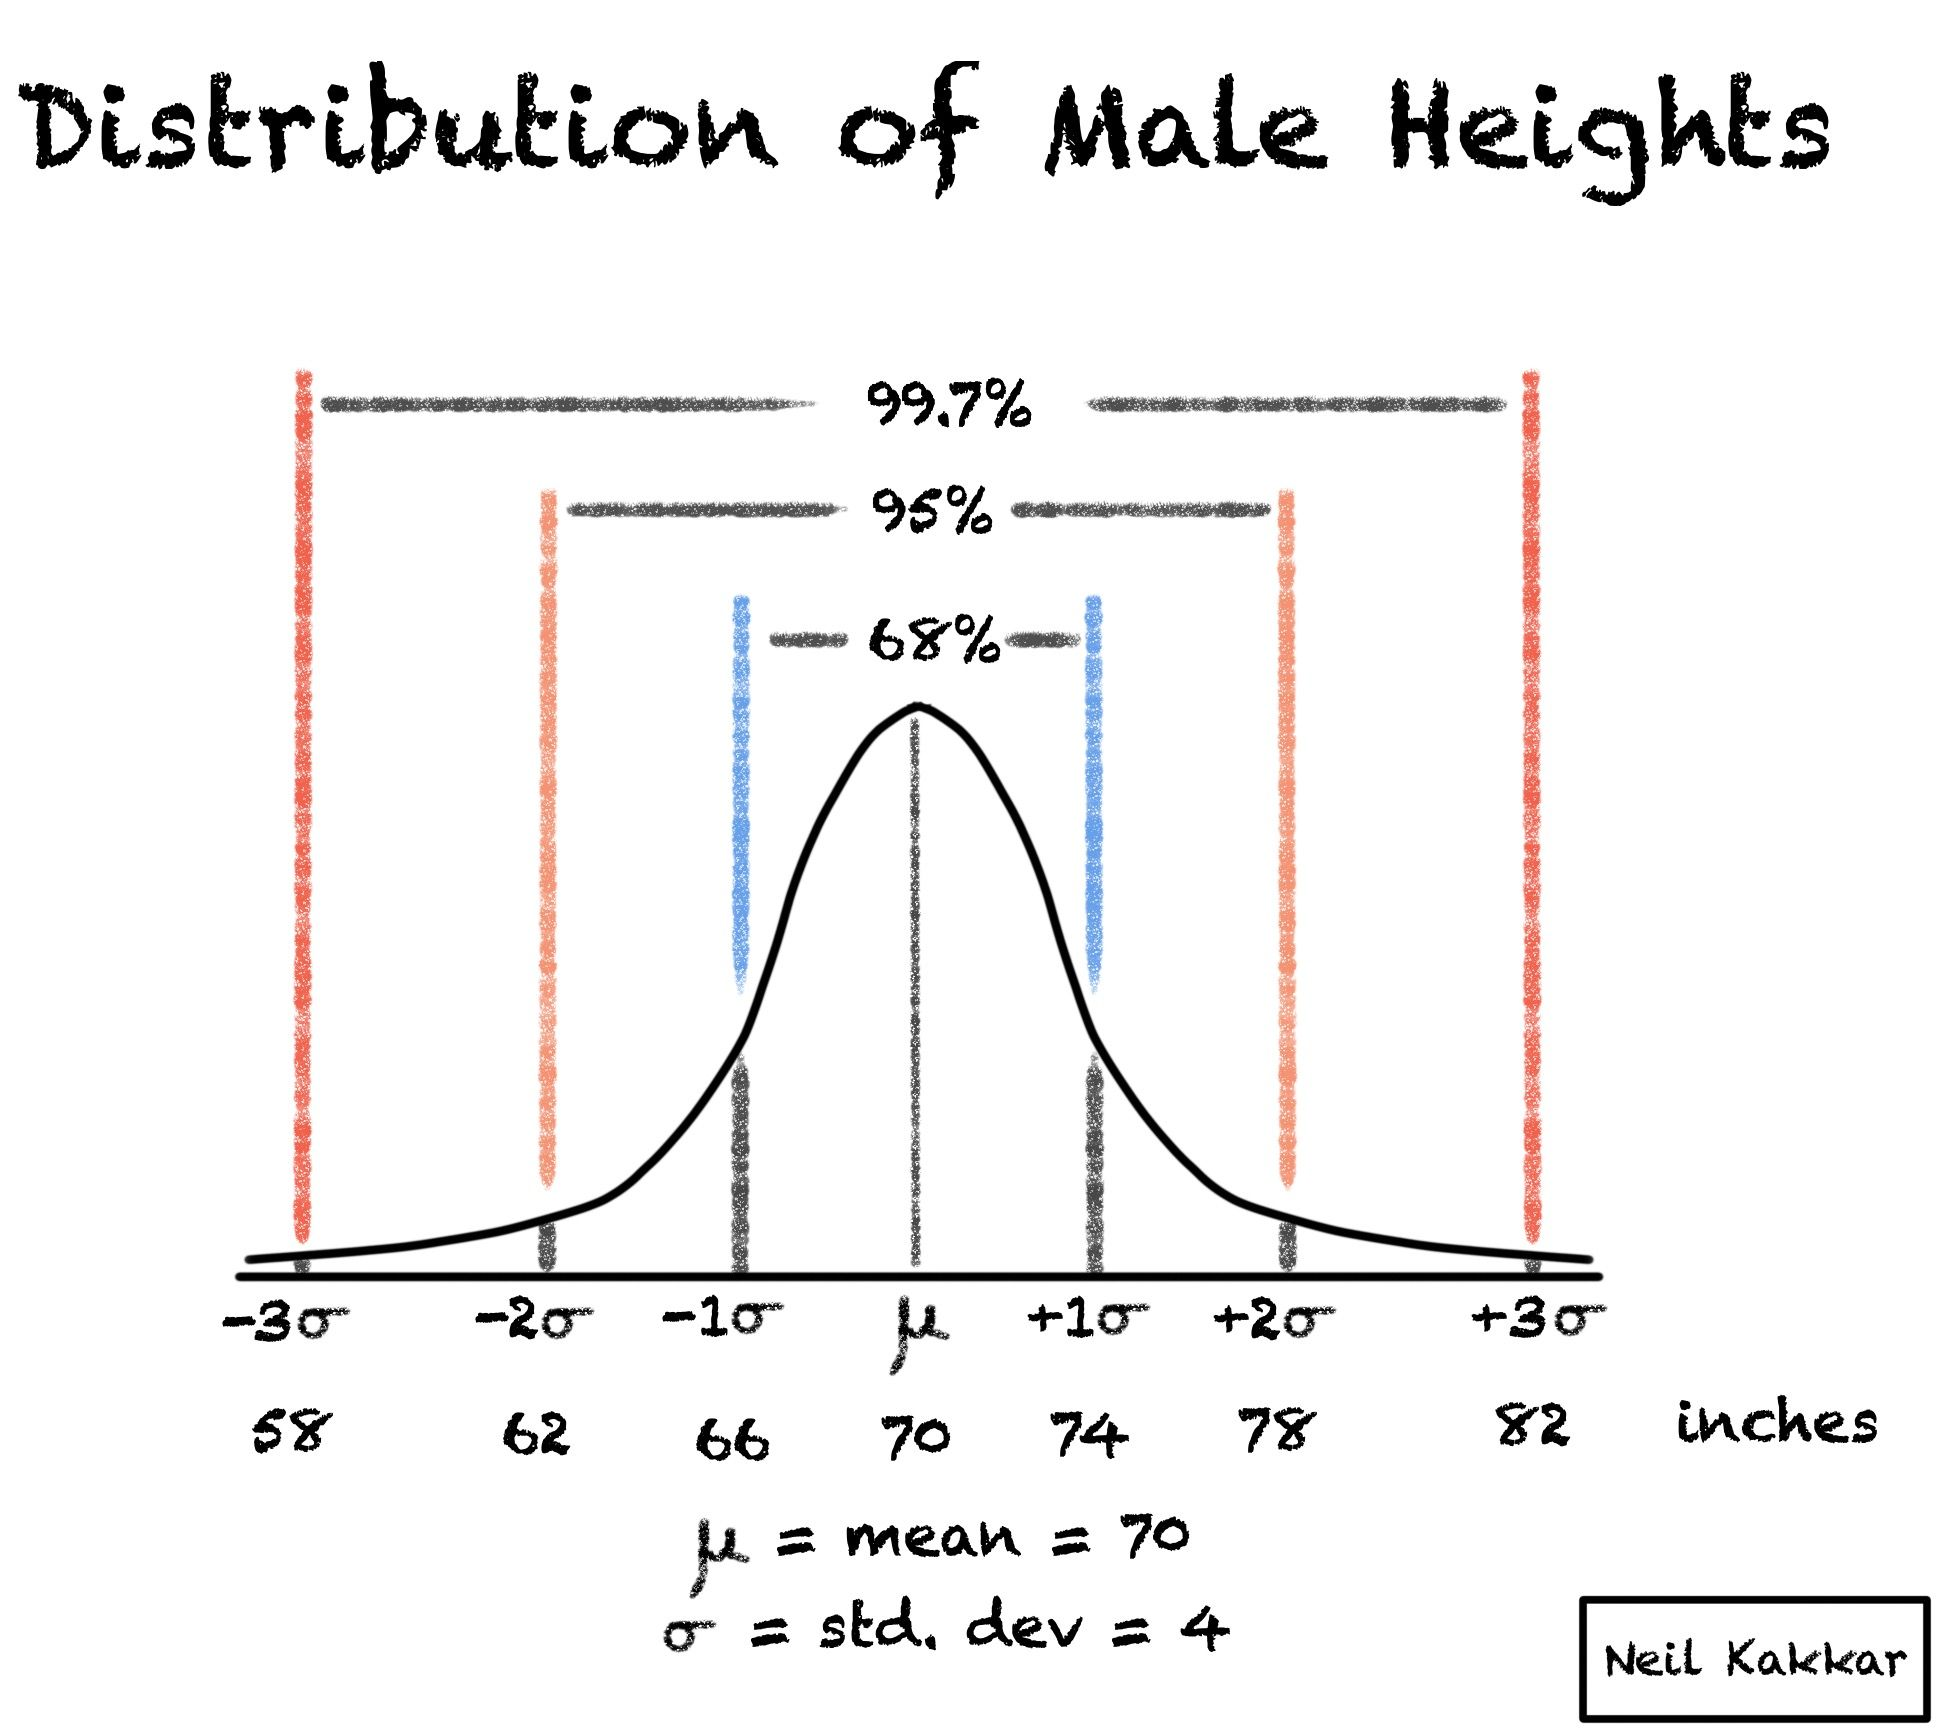

In [ ]:
### Show your Code Here ###
mean = np.mean(x_train['age'])
print("Average Age", mean)
std_dev_age = np.std(x_train['age'])
print("Age St. Dev", std_dev_age)
z_score_age = (x_train['age'] - mean)/ std_dev_age
print("Z Score on Age", z_score_age)

#Define parameters
z_score_age_68 = 1
z_score_age_95 = 1.96
z_score_age_997 = 3

#Calculate values
lower_68 = mean - z_score_age_68 * std_dev_age
upper_68 = mean + z_score_age_68 * std_dev_age
lower_95 = mean - z_score_age_95 * std_dev_age
upper_95 = mean + z_score_age_95 * std_dev_age
lower_997 = mean - z_score_age_997 * std_dev_age
upper_997 = mean + z_score_age_997* std_dev_age

#Count
records_in_68 = ((x_train['age'] >= lower_68) & x_train['age'] <= upper_68).sum()
records_in_95 = ((x_train['age'] >= lower_95) & x_train['age'] <= upper_95).sum()
records_in_997 = ((x_train['age'] >= lower_997) & x_train['age'] <= upper_997).sum()

print("Number of records within the middle 68%: ", records_in_68)
print("Number of records within the middle 95%: ", records_in_95)
print("Number of records within the middle 99.7%: ", records_in_997)


#NEED HELPPPPPPPPPPPPPPPPPPPPP!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#NEED HELPPPPPPPPPPPPPPPPPPPPP!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#NEED HELPPPPPPPPPPPPPPPPPPPPP!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#NEED HELPPPPPPPPPPPPPPPPPPPPP!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#NEED HELPPPPPPPPPPPPPPPPPPPPP!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#NEED HELPPPPPPPPPPPPPPPPPPPPP!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#NEED HELPPPPPPPPPPPPPPPPPPPPP!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#NEED HELPPPPPPPPPPPPPPPPPPPPP!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#NEED HELPPPPPPPPPPPPPPPPPPPPP!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#I can't figure out why I am getting he same totals for each?

Average Age 38.66970666666667
Age St. Dev 13.710475787293289
Z Score on Age 6920     0.315838
17926   -0.267657
1123    -0.194720
4518     1.628703
5576     0.461712
           ...   
21575    0.024091
5390    -0.559405
860     -1.507585
15795    0.826397
23654   -0.340594
Name: age, Length: 18750, dtype: float64
Number of records within the middle 68%:  18750
Number of records within the middle 95%:  18750
Number of records within the middle 99.7%:  18750


Number of records within the middle 68%:  13115
Number of records within the middle 95%:  18068
Number of records within the middle 99.7%:  18722


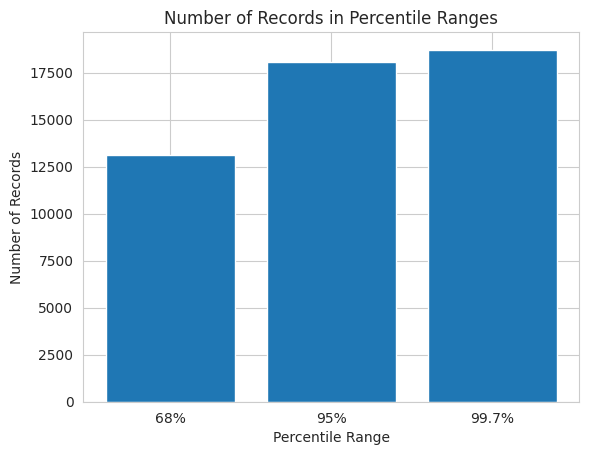

In [ ]:
q68 = np.percentile(x_train['age'], [16, 84])
q95 = np.percentile(x_train['age'], [2.5, 97.5])
q997 = np.percentile(x_train['age'], [0.15, 99.85])

records_in_68 = ((x_train['age'] >= q68[0]) & (x_train['age'] <= q68[1])).sum()
records_in_95 = ((x_train['age'] >= q95[0]) & (x_train['age'] <= q95[1])).sum()
records_in_997 = ((x_train['age'] >= q997[0]) & (x_train['age'] <= q997[1])).sum()

print("Number of records within the middle 68%: ", records_in_68)
print("Number of records within the middle 95%: ", records_in_95)
print("Number of records within the middle 99.7%: ", records_in_997)

percentiles = ['68%', '95%', '99.7%']
counts = [records_in_68, records_in_95, records_in_997]

plt.bar(percentiles, counts)
plt.xlabel('Percentile Range')
plt.ylabel('Number of Records')
plt.title('Number of Records in Ranges')
plt.show()



Provide sentence(s) explaining your solution:

This took me forever as you can see... I still need help on the first code I attempted as that was bringing all my totals the same. At this point my brain kind of hurts and I still have a lot of HW to do so I am sure it is a simple calculation error.


For my solution I used many different sources and have been predominatley using O'Reilly's 'Hands on ML with sckit-learn, keras, and tensflow', a mix of chat gpt, and stack overflow as well. This is the only problem I used GPT on so I am really hoping not to be docked for using that resource.

My first code didn't work so I'll only cover what did. I used numpy percentile's and a bit of research to break the code into the percentiles shown. The 16th percentile and 84th percentile represent about 1 st dev below the mean and 1 st dev below the mean.

I used the following website to get this information because this is news to me. https://bookdown.org/kevin_davisross/probsim-book/normal-distributions.html

from there I used a boolean mask (thanks chat GPT and stack overflow for showing this to me) which checks if the [0] is compared to 'q68' and if less than or above [1]. This ultimatleyc checks if the age value falls within the specified range. I do this throughout the percentiles.

I then printed the the totals, and created two new fields for my bar chart.

